In [7]:
import pandas as pd
import warnings
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('dataset/Framingham-Heart-Study/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [10]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<AxesSubplot:xlabel='education', ylabel='count'>

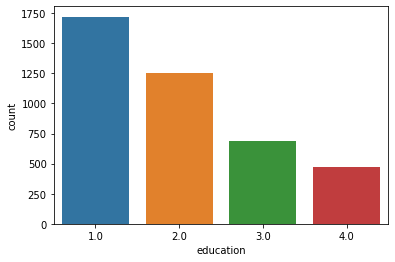

In [11]:
sns.countplot(x='education', data=df)

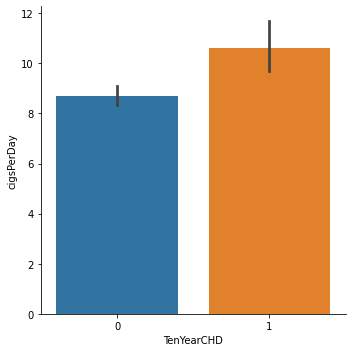

In [12]:
sns.catplot(x='TenYearCHD', y='cigsPerDay', kind='bar', data=df)

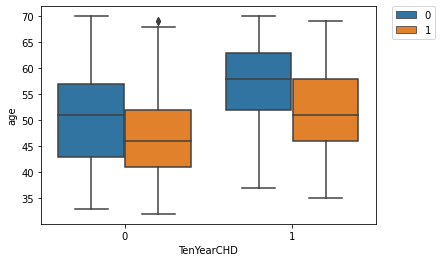

In [17]:
sns.boxplot(x='TenYearCHD', y='age',hue='currentSmoker', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


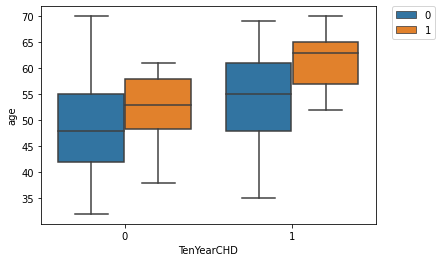

In [18]:
sns.boxplot(x='TenYearCHD', y='age', hue='prevalentStroke',data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

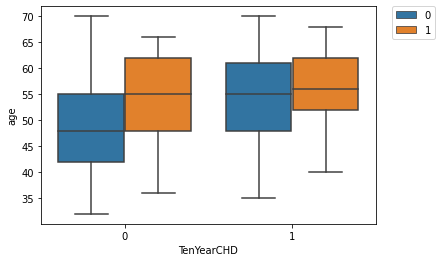

In [19]:
sns.boxplot(x='TenYearCHD', y='age', hue='diabetes',data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<AxesSubplot:xlabel='TenYearCHD', ylabel='totChol'>

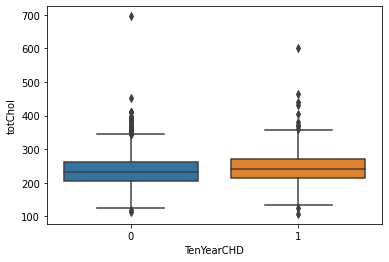

In [20]:
sns.boxplot(x='TenYearCHD', y='totChol',data=df)

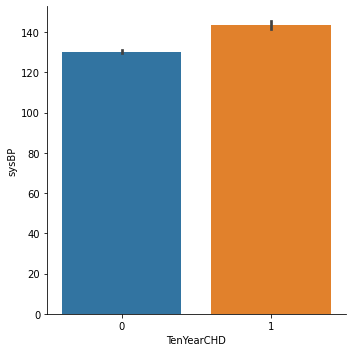

In [23]:
sns.catplot(x='TenYearCHD', y='sysBP', kind='bar', data=df)

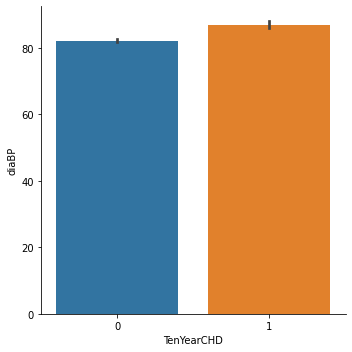

In [24]:
sns.catplot(x='TenYearCHD', y='diaBP', kind='bar', data=df)

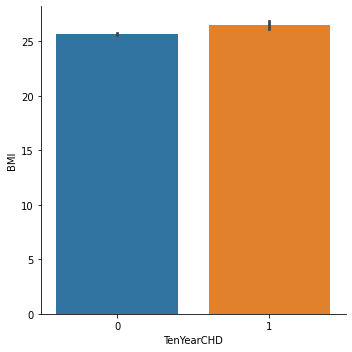

In [25]:
sns.catplot(x='TenYearCHD',y='BMI',kind='bar',data=df)

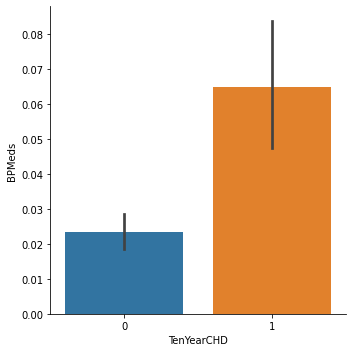

In [26]:
sns.catplot(x='TenYearCHD',y='BPMeds',kind='bar',data=df)

# Data preprocessing

In [28]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [29]:
df.dropna(inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   float64
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   float64
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.8 KB


In [31]:
df['TenYearCHD'].value_counts()

0    3101
1     557
Name: TenYearCHD, dtype: int64

In [34]:
baseline_accuracy = 3101/(3101+557)
baseline_accuracy

0.8477310005467469

# Train  test split

In [35]:
from sklearn.model_selection import train_test_split

In [71]:
y = df['TenYearCHD']
x = df.drop('TenYearCHD', axis='columns')

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.35)

In [72]:
from imblearn.over_sampling import RandomOverSampler

In [73]:
oversample = RandomOverSampler(sampling_strategy='minority')
x_over, y_over = oversample.fit_resample(x,y)

y_count_1 = list(filter(lambda x: x==1, y_over))
y_count_0 = list(filter(lambda x: x==0, y_over))
print(len(y_count_0), len(y_count_1))

3101 3101


In [74]:
X_train, X_test, y_train, y_test = train_test_split(x_over,y_over,test_size=0.35)
len(y_test)

2171

In [75]:
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

In [76]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('under', RandomUnderSampler()),
                ('model', DecisionTreeClassifier())])

In [77]:
predict = pipeline.predict(X_test)

In [79]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,predict))

# The model has high precision and recall for both outcomes, and has an accuracy of 0.90, which beats the baseline.


              precision    recall  f1-score   support

           0       0.97      0.83      0.90      1086
           1       0.85      0.98      0.91      1085

    accuracy                           0.90      2171
   macro avg       0.91      0.90      0.90      2171
weighted avg       0.91      0.90      0.90      2171

